# 개요
 > **손으로 직접쓴 숫자(필기체 숫자)로 이루어진 데이터 셋**
 - 딥러닝을 배울때 반드시 거쳐야 하는 'Hello, World' 같은 존재
 - 0~9까지 숫자 이미지로 구성, 6만개 트레이닝 데이터, 1만개 테스트 데이터로 이루어짐

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# MNIST 다운
1. csv file(, 구분)
 - Training data : http://www.pjreddie.com.media/files/mnist_train.csv
 - Test data: http://www.pjreddie.com.media/files/mnist_train.csv
 - 입력, 정답 데이터 동시 존재
   
   
2. Framework load
 - Keras(mnist.load_data(), TensorFlow ...

In [5]:
from keras.datasets import mnist

(x_train_data, t_train_data), (x_test_data, t_test_data)= mnist.load_data()

# MNIST 구조 (Data Frame)
1. mnist_train.csv : 학습에 이용될 수 있는 정답 데이터 6만개 존재
 - 1개의 데이터에 785개의 숫자가 (,)로 구분되어있음
 - 1개의 정답 숫자과 정답 숫자를 필기한 숫자 이미지를 나타내는 784개의 숫자로 구성됨
    
    
2. mnist_test.csv : 학습 후 딥러닝 아키텍처가 얼마나 잘 동작하는지 테스트할 수 있는 데이터 1만개 존재
 - 정답이 포함된 785개의 숫자로 되어있음

In [6]:
mnist_train_csv= pd.read_csv("MNIST_dataset/mnist_train.csv")
mnist_test_csv= pd.read_csv("MNIST_dataset/mnist_test.csv")

In [7]:
mnist_train_csv.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
mnist_test_csv.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# MNIST 구조(Loadtxt)
1. train_data 행렬
 - 1개의 행 (row) : 레코드
     1. 1개의 레코드는 785개의 열(column)으로 구성
     2. 1 열(column)에는 정답데이터가 있음
     3. 2 열(column)부터 마지막 열(column)까지는 정답을 나타내는 이미지의 color를 나타내는 숫자 값들 784개가 연속으로 있음 
     4. 8bit 흑백 이미지의 화소값(pixel value, gray level)을 이용해 0~255사이의 값을 가짐 (0일수록 검은색)

In [9]:
# 행렬로 표현
train_data=np.loadtxt("MNIST_dataset/mnist_train.csv", delimiter=',', dtype=np.float32)
test_data=np.loadtxt("MNIST_dataset/mnist_test.csv", delimiter=',', dtype=np.float32)

In [10]:
train_data.shape, test_data.shape

((60000, 785), (10000, 785))

In [11]:
train_data

array([[5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.]], dtype=float32)

<function matplotlib.pyplot.show(close=None, block=None)>

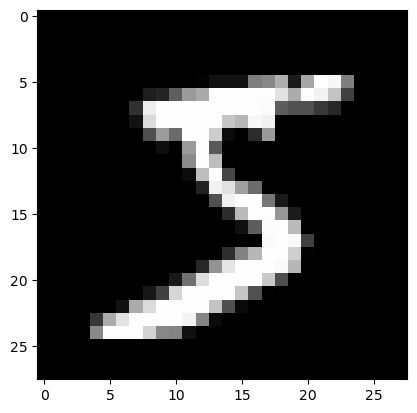

In [12]:
# 이미지로 표현
# 1번째 행의 2열부터 마지막 열까지의 784개의 데이터를 28*28행렬로 나타냄
# 이미지맵 imshow()의 camp 속성으로 흑백 이미지 출력

img=train_data[0][1:].reshape(28,28)

plt.imshow(img,cmap='gray')
plt.show

# 딥러닝 아키텍처
  
  
## 노드 개수 설정
  
1. 입력층
 - 입력층의 노드를 입력 데이터 개수와 일치하도록 (784개) 설정
 - 1개의 레코드(행): 785개의 열을 가지지만, 정답 데이터(1열)을 제외 
  
  
2. 입력층-은닉층 W2, 은닉층-출력층 W3
 - 별도의 규칙 없이 임의로 100개 설정
 - 노드 개수가 많아질때 학습 속도 느려짐
  
  
3. 출력층 : **one-hot encoding**
 - 10개 설정
 - 정답이 0~9 중 하나의 숫자 이므로 10개의 원소를 갖는 list 만듬
 - list에서 최대값을 가지는 index를 정답으로 판단할 수 있도록

## 신경망 MNIST 인식 클래스

**1. externel function**  

 - def sigmoid(x) : *# 0 또는 1을 출력하기 위한 sigmoid 함수*
  
 - def numerical_derivate(f,x) : *# 수치미분 함수*
 
**2. NeuralNetwork Class**
  
  - class NeuralNetwork:   
      - def  __init__(self, input_nodes, hidden_nodes, output_nodes) : *# 입력층, 은닉층, 출력층 개수를 입력받아 가중치, 바이어스, 학습율 초기화*
      - def feed_forward(self), def loss_val(self) :  *# 손실함수값 계산, 출력담당*
      - def train(self, train_data)  : *# 수치미분으로 가중치,바이어스 업데이트*
      - def predict(self,input_data) : *# 입력 데이터에 대한 미래 값 예측*
      - def accuracy(self, test_data): *# 정확도 측정*
  
**3. Usage**
 - nn= NeuralNetwork(784,100,10)
   
 - for step in range(30001):   *# 6만개 트레이닝 데이터 중 50%데이터로 학습진행*
     index= np.random.randint(0,59999)  *# 시간문제로 6만개 데이터 중 3만개 랜덤하게 선택*
     nn.train(train_data [index]) *# 학습진행*

In [13]:
# 수치미분 함수

def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        
        x[idx] = tmp_val - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad

# sigmoid 함수

def sigmoid(x):
    return 1 / (1+np.exp(-x))

## 딥러닝 개요
0. 뉴런
 - 인간의 뇌는 뉴런이라고 불리는 세포의 집합체
 - 뉴런은 어떤 신호를 받고 변조하고 다시 다음으로 전달함
 - 시냅스에서 뉴런이 신호를 받을 때 분비된 화학물질의 양과 분비되는 시간의 곱(w)으로 나타낼 수 있음
 - 이 값이 특정 임계점을 넘어야(활성함수) 다음 시냅스로 연결될 수 있음
 - 활성함수 값이 임계점을 넘으면 1을 리턴, 아니면 0 리턴
     - $f(\sum_{i=1}^{n}x_{i}w_{i}+b)$
     
1. 퍼셉트론 (perceptron = perception+neuron)
   - 퍼셉트론: 인공신경망의 구성요소(unit) 다수의 값을 입력받아 하나의 값으로 출력하는 알고리즘
   - 이진 분류 모델을 학습하기 위한 지도학습의 알고리즘
   - 동작과정 
     1. 다른 값 x를 입력받고, 입력된 값마다 가중치를 곱하고 편항(바이어스)를 더하여 각 값을 합산해 가중합을 도출함
     2. 이 가중합의 크기를 임계값(0)과 비교(활성화 함수를 통해)해 최종출력(0 or 1)값 결정
    - 단층 퍼셉트론: 입력값에 따른 출력값을 구분 짓는 직선을 1개 그림
      - 은닉층 없이 입력층과 출력층만 있음 : 출력값과 실제를 비교해 오차가 최소가 되도록 업데이트 하면 됨
      - 비선형 활성함수 1개-> 계단함수(입력이 0을 넘으면 1을 출력 그외는 0)를 보통 사용한다고 함(이외에 다층은 시그모이드, 렐루 등)
      
      - 활성함수를 비선형 함수로 보통 쓰는이유는 선형함수를 사용했을 때 신경망의 층을 깊게 하는 의미가 없어짐(시그모이드, 계단함수 둘다 비선형)
      - 직선 선형함수 f(f(f(f(a)))) 는 결과값의 거듭제곱꼴처럼 돼서 
       
      - and,or 게이트는 선형방정식이므로 단층퍼셉트론 가능
      - 굳이 은닉층이 없어도 된다는 뜻
      - xor게이트 표현하지 못함 (입력값이 서로 다를때만 1을 가지므로)
      - 비선형 방정식으로써 50%의 정확도밖에 못냄
      - 1969년 Marvin Minsky가 증명해냈는데 MLP로 어떻게 하는지 구현하지 못해 신경망 암흑기 옴
      - 1984년 Geoffrey Hinton이 역전파를 발표함
      
    - 다층 퍼셉트론 (Multi-Layer Perception, MLP)
       - 입력층과 출력층 사이에 여러개 은닉층이 있는 인공신경망, 출력층도 여러개일 수 있음
       - 최종 출력값과 실제값의 오차가 최소화 되도록 가중치와 바이어스를 계산해 결정하는 것
   - 심층 신경망를 학습하기 위해 고안된 알고리즘 : 딥러닝
   - 은닉층이 존재하는 다층 퍼셉토론에서 입력층이 전달되는 값이 은닉층의 모든 노드로 전달(하나의 단층 퍼셉트론)
     - 은닉층의 각 노드는 퍼셉트론의 활성함수
     - 은닉층의 모든 노드 출력값도 출력층의 모든 노드로 전달
     - => 순전파
     1. 각 노드의 가중치와 바이어스를 어떻게 업데이트?
     2. MLP에서 각 노드, 레이어가 가지고 있는 변수들은 제각각인데 얼만큼 변경하는지 어떻게 아는가? (은닉층의 출력값에 대한 기준을 정의할 수 없음)
       
       
   - 역전파: 새로운 가중치로 다시 학습화는 가정(오차가 0이 될때까지)
       - input, output 값을 알고 있는 상태에서 신경망을 학습시키는 지도학습의 개념을 사용한 퍼셉트론에서 이어짐
        - 출력층에서 발생하는 오차값을 이용해 은닉층으로 역전파 시켜 은닉층에서 발생하는 오차값에 따라 은닉층의 가중치를 업데이트 함
        - 이 강의에서는 활성함수를 sigmoid로 결정
        - 체인룰(chain rule) => 시그모이드 함수를 미분할때 체인룰을 적용하여 빠른 속도의 가중치를 얻을 수 있음
        - 역전파를 실행할 때 가중치를 결정하는 방법은 경사하강법(강의에서는 수치미분이라고 표현함)을 사용=> 오래걸림
        - 출력층에서 한번 미분한 후 결과를 뒤에 노드에 전달하면서 재사용
        - 히든층의 활성도(출력값 y)를 바꿀 때 얼마나 빨리 오차가 변하는지(오차변화도 함수) 계산가능 -> 가중치 바꿀 때 오차가 얼마나 빨리 변하는지
       - 대신 모든 점에서 연속이며 미분 가능하므로 신경망이 극단적인 형태가 아니라 데이터를 섬세하게 분류할 수 있도록 도와줌
        
      

## Xavier(사비에르)/He  방법
  
 1. 가중치 초기화의 중요성(시그모이드를 쓸때)
 - 은닉층이 있는 퍼셉트론에서 왜 계단함수를 안쓰고 시그모이드를 쓰냐
     - 계단형식 함수를 미분 가능하도록 곡선화 시키고이상치가 들어와도 0,1에 매끄럽게 수렴해서 괜찮음
     
 - 단점
     - 시그모이드를 쓰면 로지스틱 회귀를 겹겹히 쌓아놓은 구조로 돼서 다층 퍼셉트론이라고 하기 애매하다는 의견도 있음
     1. 은닉층이 깊어질수록 가중치가 0으로 수렴하여 정확성이 감소함
         - 이는 2개이상의 은닉층을 가진 다층 퍼셉트론인 심층신경망(DNN)일때 말함
         - 역전파에서 기울기를 계산할 때 시그모이드 함수의 미분꼴을 갖게 되고, 깊이가 깊어질수록 시그모이드의 미분 인자가 하나씩 추가되므로 최종 계산 결과(0,1)인 기울기 값이 0에 가까워져버림 -> 앞층으로 역전파가 안됨
         - 시그모이드 함수의 0,1 값의 기울기는 0.000x 이기 때문(대칭분포)
         - 대표적인 곡선 함수 시그모이드는 역전파를 할 때 기울기 소실이 발생
     
     2. 시그모이드 함수의 출력값이 모두 양수이므로 경사하강법시 기울기가 양수, 음수가 돼 기울기 업데이트가 지그재그로 변동하면 학습효율성을 감소시켜 매우 오래걸림

 - 은닉층에서 시그모이드 사용(하고싶으면 하이퍼볼릭 탄젠트쓰기)하지 않기, 이진분류 하고싶을 때 출력에서 사용하기
 - => Relu 알고리즘 사용 (x값이 0이하면 0을 출력, 0 이상이면 비례함수를 적용해 max(0,x)함수사용해 그 값을 그대로 반환
 - 출력층에는 활성화함수를 쓰지 않거나, 소프트맥스 등 다른 함수를 쓸수있음
   
   
 **시그모이드를 잘 쓰기 위해 가중치를 초기화 하는 방법** 
   
   
  1. 0을 써보자
   - 뉴런이 트레이닝 중 동일한 특성을 학습하게 되어 두번째 뉴런에도 똑같은 값이 전달되고(순전파할때) , 역전파에서 모든 가중치 값이 똑같아짐
   - 대칭적인 가중치가 되어 두 노드가 같은 일을 하게 되는 중복성이 발생
   - 중복성이 발생되면 은닉층을 쓰는 이유가 없어짐..  
     
     
  2. 무작위로 해보자(강의에서 씀) 
   - 분포도를 확인해보면 활성화 값이 0과 1에 치우쳐져 분포됨
   - 시그모이드 함수는 출력이 0,1에 가까워지면 미분값이 0이되어버려
   - 역전파때 기울기가 점점 작아지다가 아예 사라짐!!(Gradient Vanshing)
     
     
  3. 가우시안 분포를 따르는 값에 따라 랜덤하게 초기화 해보자 N(0,0.01)
    - 표준편차를 크게 할 때 (1) 시그모이드 값인 0,1의 기울기인 0으로 수렴하여 기울기가 계속 없어지기 때문 => 역전시 기울기가 0
   -  작은 표준편차를 할 때 (0.001) 0.5 중심으로 모여있어 가중치 손실 덜하지만 출력값이 모두 동일하면 역전파할때 가중치를 동일하게 계산하게 됨  
     
     
 2. Weight decay : 가중치 감소기법 정리
 > - 가능한한 작은 값이며 겹치지 않은 가중치를 사용
 > - 각 층의 활성화 함수를 거쳐 나온 값들은 적당히 골고루 분포되어있어야 함
 > - 이전 레이어의 활성함수 값과 다음 레이어의 활성 함수 평균, 표준편차가 일정해야 레이어를 깊고 무한하게 쌓을 수 있음
  - **np.random.randn 쓰면 w 평균값 0, 표준편차가 1인 정규분포를 따르도록 초기화+ 작은상수 곱합**
       - 작은 상수 곱하는 이유는 w가 크면 그 전 시그모이드 출력값 a는 작아지고, 거기에 가중치 곱한 w는 엄청 커져서.. => 역전파하면 기울기가 0이됨  
         
         
 **3. Xavier/He**
  - 적당히 골고루 분포되게 하는법
  
  1. Xavier intialization
   - 평균을 0으로 유지하되, 분산값(표준편차)을 조정한다
   - 주로 시그모이드, 하이퍼 탄젠트와 같은 s자형 곡선을 가지는 활성화 함수에서 쓰임
   - 뉴런의 개수가 많아지면 그만큼 적은 값의 분포를 활용하여 가중치가 더 좁게 펴져 레이어가 깊어질수록 데이터가 적당히 넓게 퍼지게 됨
   - 뉴런 개수에 따라 가중치가 초기화되므로 고정된 표준편차를 쓰는 것 보다 이상값에 영향을 덜 받는 로버스트한 통계량을 가짐(다음 층의 노드 수도 사용)
   - 단순히 작게하는게 아니라 표준 정규분포를 입력 개수의 표준편차로 나눔
   - 표준편차= 분산의 제곱근으로 평균으로부터 원래 데이터에 대한 오차범위 근사값
   > w = np.random.randn(n_input,n_output)/sqrt(n_input)
  - 렐루에서는 가중치초기화로 사비에르를 쓰면 출력값이 0으로 수렴하므로 안됨
  - Tensorflow keras에서 디폴트로 제공하는 가중치 초기화 방법
      - Xavier uniform(파라미터 상한,하한값 정해 그 안에서 초기화)
   2. He intialization 
    - Relu와 같이 쓰임
    - 표준 정규분포로 초기화 된 가중치를 2/입력개수 제곱근으로 나눔
    > w= np.random.randn(n_input,n_output)/sqrt(2/n_input)

## 데이터 전처리
### 입력데이터 정규화(Nomalization)
   1. 일반적인 정규화 방법
    - 딥러닝에서 입력 데이터의 상대적 크기에 대한 영향을 줄이기 위해 MinMax공식을 이용해 모든 데이터 범위를 0~1사이의 값으로 변화 시킴
      
      
   - $data_{new}=\frac{data-Min}{Max-Min}$
       
       
   - 데이터의 최대값(255*0.99)로 나누어줌
   - 모든 입력값을 0~1사이 값으로 정규화함
       - data = (input_data[index, :] / 255.0 * 0.99) + 0.01
       
   2. normalize (정규화)
     - 원핫 인코딩을 위한 10개의 노드 0.01 초기화 
       - self.target_data=np.zeros(output_nodes)+0.01
     - 정답을 나타내는 인덱스의 가장 큰 값인 0.99로 초기화
     - 정답: 5일 경우 출력노드의 5번째 인덱스에 0.99를 집어넣음 
       - self.target_data[int(training_data[0])] = 0.99
     - 입력 데이터가 0~255이므로 이를 그대로 사용할 경우 손실함수 cross_entropy log부분에서 오버플로우가 생길 가능성 있음
       
    
       
### 미래값 예측에서의 원핫인코딩
1. 원핫인코딩 (One-Hot Encoding)
 - 단어 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어 인덱스에 1, 나머지 인덱스에는 0 부여
 - 정답이 되는 인덱스가 가장 큰값을 가지므로 이를 1로 만들어줌  
 
2. np.argmax(y)
 - 가장 큰 값을 가지는 원소의 인덱스를 반환
 - 큰 원소가 여러개 있을 경우 가장 앞에 있는 인덱스 반환
   
3. Tensorflow 프레임워크, keras 라이브러리 
 - tf.keras.utils.to_categorical(train, num_classes=10)
 - 정답데이터가 0~9까지이므로 10개 설정
 
## 정확도 측정 함수
1. accuracy()
 - 만든 딥러닝 아키텍처가 얼마나 정확하게 mnist를 구별했는지 판단
   1. test_data를 입력받아 1열에 있는 정답을 분리함
   2. test_data 안에 있는 정답 이외의 784개의 데이터를 0~1사이 값 갖도록 정규화
   3. predict() 호출 후 실제 정답과 예측한 정답이 맞는지 판단
   4. 맞으면 match_list에 넣음, 틀리면 not_match_list에 넣음
   5. test_data의 길이로 macth_list의 길이를 나누고 %화 시킴

In [14]:
# MNIST_Test Class

class MNIST_Test:
    
    # 생성자
    # xdata, tdata => numpy.array(...)
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        
        self.input_nodes = input_nodes # 784개
        self.hidden_nodes = hidden_nodes # 100개
        self.output_nodes = output_nodes # 10개
        
        # 은닉층 가중치  W2  Xavier/He 방법으로 self.W2 가중치 초기화
        self.W2 = np.random.randn(self.input_nodes, self.hidden_nodes) / np.sqrt(self.input_nodes/2)
        self.b2 = np.random.rand(self.hidden_nodes)      
        
        # 출력층 가중치는 W3  Xavier/He 방법으로 self.W3 가중치 초기화
        self.W3 = np.random.randn(self.hidden_nodes, self.output_nodes) / np.sqrt(self.hidden_nodes/2)
        self.b3 = np.random.rand(self.output_nodes)      
        
        # 2층 hidden layer unit 
        # 가중치 W, 바이어스 b 초기화
        #self.W2 = np.random.rand(input_nodes, hidden_nodes)  
        #self.b2 = np.random.rand(hidden_nodes)
        
        # 3층 output layer unit : 1 개 
        #self.W3 = np.random.rand(hidden_nodes,output_nodes)
        #self.b3 = np.random.rand(output_nodes)
                        
        # 학습률 learning rate 초기화
        self.learning_rate = learning_rate
        
        print("MNIST_Test object is created !!!")
        
    # 손실함수
    def feed_forward(self):
        
        delta = 1e-7    # log 무한대 발산 방지
    
        z1 = np.dot(self.input_data, self.W2) + self.b2
        y1 = sigmoid(z1)
        
        z2 = np.dot(y1, self.W3) + self.b3
        y = sigmoid(z2)
    
        # cross-entropy 
        return  -np.sum( self.target_data*np.log(y + delta) + (1-self.target_data)*np.log((1 - y)+delta ) )
    
    # obtain W and b
    def get_W_b(self):
        
        return self.W2,  self.b2, self.W3, self.b3
    
    # 손실 값 계산 후 외부 출력용으로 사용됨
    def loss_val(self):
        
        delta = 1e-7    # log 무한대 발산 방지
    
        z1 = np.dot(self.input_data, self.W2) + self.b2
        y1 = sigmoid(z1)
        
        z2 = np.dot(y1, self.W3) + self.b3
        y = sigmoid(z2)
    
        # cross-entropy 
        return  -np.sum( self.target_data*np.log(y + delta) + (1-self.target_data)*np.log((1 - y)+delta ) )
    
    # query, 즉 미래 값 예측 함수
    def predict(self, input_data):    
        
        z2 = np.dot(input_data, self.W2) + self.b2
        a2 = sigmoid(z2)
        
        z3 = np.dot(a2, self.W3) + self.b3
        y = a3 = sigmoid(z3)
    
        # MNIST 경우는 one-hot encoding 을 적용하기 때문에
        # 0 또는 1 이 아닌 argmax() 를 통해 최대 인덱스를 넘겨주어야 함
        predicted_num = np.argmax(y)
    
        return predicted_num

    # 정확도 측정함수
    def accuracy(self, input_data, target_data):
        
        matched_list = []
        not_matched_list = []
        
        # list which contains (index, label, prediction) value
        index_label_prediction_list = []
        
        # temp list which contains label and prediction in sequence
        temp_list = []
        
        for index in range(len(input_data)):
                        
            label = int(target_data[index])
                        
            # normalize
            data = (input_data[index, :] / 255.0 * 0.99) + 0.01
      
            predicted_num = self.predict(data)
        
            if label == predicted_num:
                matched_list.append(index)
                
            else:
                not_matched_list.append(index)
                
                temp_list.append(index)
                temp_list.append(label)
                temp_list.append(predicted_num)
                
                index_label_prediction_list.append(temp_list)
                
                temp_list = []
                
        print("Current Accuracy = ", len(matched_list)/(len(input_data)) )
        
        return matched_list, not_matched_list, index_label_prediction_list
    
        
    # 수치미분을 이용하여 손실함수가 최소가 될때 까지 학습하는 함수
    def train(self, input_data, target_data):
     
        self.input_data = input_data
        self.target_data = target_data
        
        f = lambda x : self.feed_forward()
        
        self.W2 -= self.learning_rate * numerical_derivative(f, self.W2)
    
        self.b2 -= self.learning_rate * numerical_derivative(f, self.b2)
        
        self.W3 -= self.learning_rate * numerical_derivative(f, self.W3)
    
        self.b3 -= self.learning_rate * numerical_derivative(f, self.b3)

In [15]:
#hyper-parameter
i_nodes = train_data.shape[1] - 1    # input nodes 개수 784개
h1_nodes = 30  # hidden nodes 개수. Test 8->30
o_nodes = 10    # output nodes 개수
lr = 1e-2      # learning rate
epochs = 1   # 반복횟수 역전파를 한번 돌림

# 손실함수 값을 저장할 list 생성
loss_val_list = []

# MNIST_Test 객체 생성
obj = MNIST_Test(i_nodes, h1_nodes, o_nodes, lr)

print("Neural Network Learning using Numerical Derivative...")

start_time = datetime.now()

for step in range(epochs):
    
    for index in range(len(train_data)):    
                
        # input_data, target_data normalize    
        input_data = ((train_data[index, 1:] / 255.0) * 0.99) + 0.01
        
        target_data = np.zeros(o_nodes) + 0.01    
        target_data[int(train_data[index, 0])] = 0.99
        
        obj.train(input_data, target_data)
        
        if (index % 200 == 0):
            print("epochs = ", step, ", index = ", index, ", loss value = ", obj.loss_val())
            
        # 손실함수 값 저장
        loss_val_list.append(obj.loss_val())        

end_time = datetime.now()
        
print("")
print("Elapsed Time => ", end_time - start_time)

MNIST_Test object is created !!!
Neural Network Learning using Numerical Derivative...
epochs =  0 , index =  0 , loss value =  10.575341940636896
epochs =  0 , index =  200 , loss value =  3.18859610487451
epochs =  0 , index =  400 , loss value =  2.8590640943758125
epochs =  0 , index =  600 , loss value =  2.942886005793964
epochs =  0 , index =  800 , loss value =  2.8419300812591244
epochs =  0 , index =  1000 , loss value =  2.221285705544171
epochs =  0 , index =  1200 , loss value =  1.9387274464153454
epochs =  0 , index =  1400 , loss value =  1.7034484901501188
epochs =  0 , index =  1600 , loss value =  2.9203411100595704
epochs =  0 , index =  1800 , loss value =  2.491437571355741
epochs =  0 , index =  2000 , loss value =  3.4487458726181304
epochs =  0 , index =  2200 , loss value =  1.9846106156130507
epochs =  0 , index =  2400 , loss value =  2.023065590998051
epochs =  0 , index =  2600 , loss value =  2.480488851902815
epochs =  0 , index =  2800 , loss value =  2

KeyboardInterrupt: 

In [ ]:
test_data = np.loadtxt('./mnist_test.csv', delimiter=',', dtype=np.float32)
print("test_data.shape = ", test_data.shape)

test_input_data = test_data[ :, 1: ]
test_target_data = test_data[ :, 0 ]

(true_list_1, false_list_1, index_label_prediction_list) = obj.accuracy(test_input_

In [ ]:
# 손실함수 추세 확인
x_data_list = [ index for index in range(len(training_data)) ]
Y_DATA_LIST = []

for index in range(0, len(loss_val_list), 500):
    Y_DATA_LIST.append(loss_val_list[index])
    
plt.title('MNIST Loss Value Trend')
plt.xlabel('data index ( X 500)')
plt.ylabel('loss value')
plt.grid()
#plt.ylim(2.1, 7.1)
#plt.plot(x_data_list, loss_val_list, color='b')
plt.plot(Y_DATA_LIST, color='b')
plt.show()

# 정확도 높이기
> 시간을 줄이기 위해 오차 역전파로 해결
1. 여러개의 은닉층 두기
2. 합성곱 신경망(CNN) 활용
